# Assignment 2 Question1

Learning Zipf's Law

# Zipf's Law Statement:

Zipf's Law Statement: This law states that given some written text, the frequency of any word is inversely proportional to its statistical rank. As applied to words this means the top ranking word, the one used most frequently occurs twice as often as the second most used word, and three times as often as the third most used word. This distribution has been shown to hold for all languages examined. Zipf’s Law has also been shown to hold forword sequences within a text. 

In [61]:
import nltk
from nltk.corpus import brown as br
#br.fileids()

In [66]:
import nltk, itertools
from nltk.corpus import brown as br
import string
punc = string.punctuation  

#Getting list of words from all the files in brown corpus
normal_words = []
for file in br.fileids():                              
    normal_words += [word for word in br.words(file) if word not in punc]
normal_words[:15]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced']

In [14]:
import operator
words_dict = {}
for x in normal_words:   
    if x in words_dict: 
        words_dict[x] +=1
    else:               
        words_dict[x] = 1
#Sort the dictionary according to values and take top 10 words and respective frequencies
sorted_words_dict = sorted(words_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
print('Top 10 most frequent word and their respective frequencies: \n\n', sorted_words_dict)

Top 10 most frequent word and their respective frequencies: 

 [('the', 62713), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011), ('was', 9777), ('for', 8841)]


In [18]:
import nltk
%matplotlib inline
from nltk.corpus import brown
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import plot, loglog, show
fd = nltk.FreqDist() # Instantiate a FreqDist object
for word in brown.words(categories='news'): # iterate over words
    fd[word] += 1 # increment count for this word

In [19]:
freqs = [t[1] for t in fd.items()]
ranks = range(len(freqs))
freqs = sorted(freqs, reverse=True)
print()

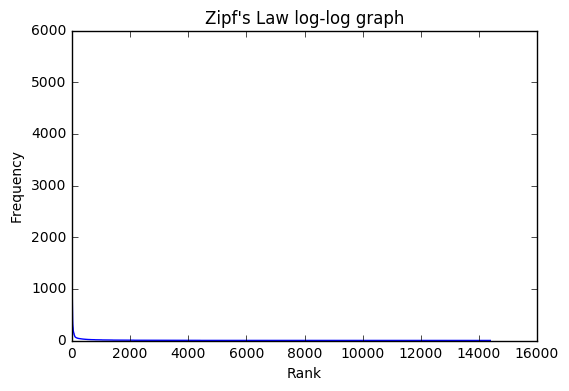

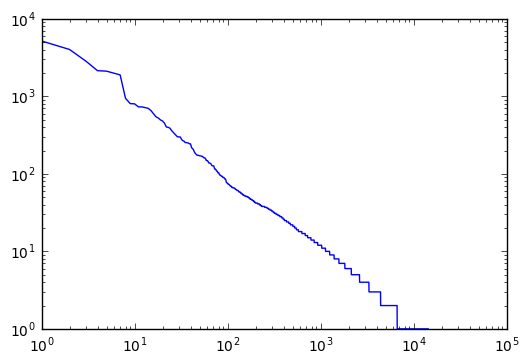

In [65]:
plot(ranks, freqs) # regular plot
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law log-log graph")
show()
loglog(ranks, freqs) # log-log plot
show()

# Question-1

Prove if zif's law works for Natural Language

In [205]:
import nltk.corpus, glob, csv, math
import matplotlib.pyplot as plt
from nltk.corpus import brown as br

In [206]:
globVar=glob.glob('C:/Users/kamal/AppData/Roaming/nltk_data/corpora/brown/ca*')
length=len(globVar)
length

45

In [209]:
words=[]
count={}
for name in glob.glob('C:/Users/kamal/AppData/Roaming/nltk_data/corpora/brown/ca*'):
    [words.append(word.lower()) for word in br.words(name) if word.isalpha()]
print(words[:20])  

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took']


In [210]:
for word in words:
    count[word]=count.get(word,0)+1
sorted_list=sorted(count.items(), key=lambda x: x[1])
listofwords= sorted(sorted_list,key=lambda x: x[1],reverse=True)
print(listofwords[:10])

[('the', 6386), ('of', 2861), ('and', 2186), ('to', 2144), ('a', 2130), ('in', 2020), ('for', 969), ('that', 829), ('is', 733), ('was', 717)]


In [211]:
#Rank the words
def rank(list_of_sorted_words):
    ranked_words_list = []
    rank = 1;
    for word in list_of_sorted_words:
        rank_words = word[0]+','+str(rank)+','+str(word[1])
        rank+=1
        ranked_words_list.append(rank_words)
    return ranked_words_list
all_words_list = rank(listofwords)

In [214]:
with open('word_freq.csv', 'wt') as output:
    writer = csv.writer(output, delimiter=',', quoting=csv.QUOTE_NONE, lineterminator='\n')
    #Inserting heading in the first row
    writer.writerow(("Word", "Rank", "Frequency"))
    for row in all_words_list:
        element = row.split(',')
        writer.writerow(element)
    output.close()

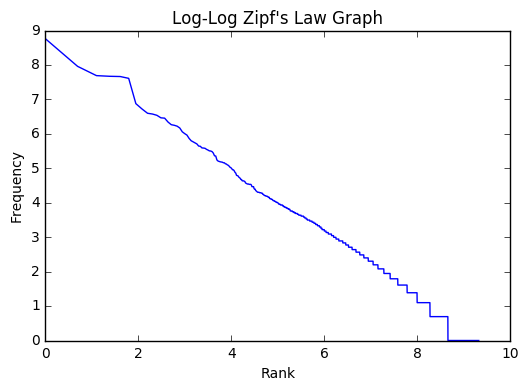

In [215]:
read_values = []
with open('word_freq.csv', 'r') as file:
    reader = csv.reader(file)
    row = next(reader)
    for row in reader:
        read_values.append(row[1:])
rank = []
freq = []
for row in read_values:
    rank.append(math.log(int(row[0])))
    freq.append(math.log(int(row[1])))
plt.plot(rank, freq)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Log-Log Zipf's Law Graph")
plt.show()

# Conclusion:

We can observe from the above graph the top ranking word occured twice as often as the second most used word, and three times as often as the third most used word. Hence we can conclude zipf's law works for Natural Language. 

# Question2 Part-1

Read all the files from the folder data using json

My Data folder link: C:\Users\kamal\Desktop\python Assignments\Data

In [112]:
import os
import json
import pandas as pd
from pandas import DataFrame
path_to_json = 'C:/Users/kamal/Desktop/python Assignments/Data'
#It gives all the json files that has extension as .json
json_file= [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files=json_file[:10]
#printing first 10 json files
print(json_files)  

['1-abercrombie-lane-sydney.json', '1-chicken-rice-and-seafood-houston.json', '1-chinese-kitchen-san-jose-2.json', '10-custom-pizzeria-braddon.json', '10-downing-street-london.json', '10-greek-street-london.json', '100-club-london.json', '100-de-agave-denver.json', '100-hoxton-london.json', '109-adelaide.json']


In [140]:
for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        # printing the json files
        jfile=json.load(json_file)
        print(jfile)

{'coordinates': {'latitude': -33.8643303, 'longitude': 151.2080231}, 'is_closed': False, 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/DP-pXLzGAR_KjGzFs-yg2g/o.jpg', 'price': '$$', 'hours': [{'hours_type': 'REGULAR', 'is_open_now': False, 'open': [{'end': '1530', 'is_overnight': False, 'day': 0, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 1, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 2, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 3, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 4, 'start': '0730'}]}], 'phone': '+61292510000', 'term': 'restaurants', 'location': {'address2': '', 'city': 'Sydney', 'address1': '1 Abercrombie Lane', 'address3': '', 'zip_code': '2000', 'country': 'AU', 'state': 'NSW'}, 'is_claimed': False, 'url': 'https://www.yelp.com/biz/1-abercrombie-lane-sydney?adjust_creative=92p07_JjKyriZTQxAXRiKQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=92p07_JjKyriZTQxAX

In [201]:
import glob,json,os,csv,datetime
#Giving path to the directory where DataProcessed folder is present
path_to_dir='C:/Users/kamal/Desktop/python Assignments/DataProcessed'
#Checking is the DataProcessed folder existed or not if not creating a new folder
if not os.path.exists(path_to_dir):
    os.makedirs(path_to_dir)
#Reading all the json files in the Data folder
for jsonfiles in glob.glob('C:/Users/kamal/Desktop/python Assignments/Data/*'):
    with open(jsonfiles) as json_data:
        jfile= json.load(json_data)
        country= jfile['location']['country']
        print(country)
        cityname=jfile["location"]["city"]
        print(cityname)
        term=jfile['term']
        print(term)

AU
Sydney
restaurants
US
Houston
restaurants
US
San Jose
restaurants
AU
Braddon
restaurants
GB
London
attractions
GB
London
restaurants
GB
London
attractions
US
Denver
restaurants
GB
London
restaurants
AU
Adelaide
hotels
AU
Melbourne
restaurants
GB
Glasgow
restaurants
AU
Brisbane
restaurants
US
Phoenix
restaurants
GB
Glasgow
restaurants
AU
Perth
restaurants
US
San Francisco
restaurants
US
San Jose
attractions
US
Boston
restaurants
US
San Francisco
restaurants
AU
Melbourne
restaurants
US
Las Vegas
attractions
AU
Perth
restaurants
AU
Sydney
restaurants
US
Detroit
restaurants
US
Seattle
attractions
US
Houston
attractions
US
Washington
restaurants
NZ
Auckland
hotels
AU
Belconnen
restaurants
US
San Francisco
restaurants
US
Charlotte
restaurants
US
Washington
attractions
US
Denver
restaurants
US
New York
restaurants
US
Houston
attractions
US
Houston
attractions
US
Houston
attractions
US
Houston
attractions
US
Houston
attractions
US
Katy
attractions
US
Milpitas
attractions
US
Pasadena
attract

In [204]:
# To generate the folder hierarcy
if not os.path.exists(os.path.join(path_to_dir,country)):
    os.makedirs(os.path.join(path_to_dir,country))
    if not os.path.exists(os.path.join(path_to_dir,country,cityname,term)):
        os.makedirs(os.path.join(path_to_dir,country,cityname,term))
        os.chdir(os.path.join(path_to_dir,country,cityname,term))
        with open(jsonfiles,'w') as json_file:
            json.dump(jfile, json_file)
else:
    if not os.path.exists(os.path.join(path_to_dir,country,cityname,term)):
        os.makedirs(os.path.join(path_to_dir,country,cityname,term))
        os.chdir(os.path.join(path_to_dir,country,cityname,term))
        with open(jsonfiles,'w') as json_file:
            json.dump(jfile, json_file)
    else:
        os.chdir(os.path.join(path_to_dir,country,cityname,term))
        with open(jsonfiles,'w') as json_file:
            json.dump(jfile, json_file)

# Conclusion

Generated folder hierarchy as DataProcessed/county name/city name/category/json files

# Question2 Part-2

In [229]:
import os
import json
import pandas as pd
from pandas import DataFrame
path_to_json = 'C:/Users/kamal/Desktop/python Assignments/Data'
#It gives all the json files that has extension as .json
json_file= [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files=json_file[:10]
#printing first 10 json files
print(json_files)  

['1-abercrombie-lane-sydney.json', '1-chicken-rice-and-seafood-houston.json', '1-chinese-kitchen-san-jose-2.json', '10-custom-pizzeria-braddon.json', '10-downing-street-london.json', '10-greek-street-london.json', '100-club-london.json', '100-de-agave-denver.json', '100-hoxton-london.json', '109-adelaide.json']


In [230]:
for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        # printing the json files
        jfile=json.load(json_file)
        print(jfile)

{'coordinates': {'latitude': -33.8643303, 'longitude': 151.2080231}, 'is_closed': False, 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/DP-pXLzGAR_KjGzFs-yg2g/o.jpg', 'price': '$$', 'hours': [{'hours_type': 'REGULAR', 'is_open_now': False, 'open': [{'end': '1530', 'is_overnight': False, 'day': 0, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 1, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 2, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 3, 'start': '0730'}, {'end': '1530', 'is_overnight': False, 'day': 4, 'start': '0730'}]}], 'phone': '+61292510000', 'term': 'restaurants', 'location': {'address2': '', 'city': 'Sydney', 'address1': '1 Abercrombie Lane', 'address3': '', 'zip_code': '2000', 'country': 'AU', 'state': 'NSW'}, 'is_claimed': False, 'url': 'https://www.yelp.com/biz/1-abercrombie-lane-sydney?adjust_creative=92p07_JjKyriZTQxAXRiKQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=92p07_JjKyriZTQxAX

All the json files which contains the key word restaurants are printed

In [235]:
import json

# defining a list of keywords
keywords = ('restaurants')
with open(os.path.join(path_to_json, js)) as json_file:
    # read json file line by line
    for line in json_file.readlines():
        #print(line)
        if any(keyword in line for keyword in keywords):       
#to print all json files which contains the keyword restaurants    
            print(json_files)
            

['1-abercrombie-lane-sydney.json', '1-chicken-rice-and-seafood-houston.json', '1-chinese-kitchen-san-jose-2.json', '10-custom-pizzeria-braddon.json', '10-downing-street-london.json', '10-greek-street-london.json', '100-club-london.json', '100-de-agave-denver.json', '100-hoxton-london.json', '109-adelaide.json']


In [ ]:
import glob,json,os,csv,datetime
#Giving path to the directory where DataProcessed folder is present
path_to_dir='C:/Users/kamal/Desktop/python Assignments/DataProcessed'
os.chdir('C:/Users/kamal/Desktop/python Assignments/')
with open('restaurant_outputCSV.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Name of Restaurants','City','Country Code','Day of Week','Start time(hour)','Start time(mins)','End time(hour)','End time(mins)'])
    for direct, subdir, files in os.walk(path_to_dir):
        for file in files:
            #print(file)
            if file.endswith('.json'): #removing the files like .DS_Store
                 with open(os.path.join(direct,file),'r',encoding='utf-8', errors='ignore') as json_data:
                        jfile= json.load(json_data)

In [ ]:
if jfile['term'] == 'restaurants':
    if 'hours' in jfile.keys():
        for i in range(len(jfile['hours'][0]['open'])):
            morn_start_time=jfile['hours'][0]['open'][i]['start']
            morn_end_time=jfile['hours'][0]['open'][i]['end']
            writer.writerow([jfile['name'],
                             jfile['location']['city'],
                             jfile['location']['country'],
                             jfile['hours'][0]['open'][i]['day'],
                             datetime.datetime.strptime(morn_start_time,'%H%M').hour,
                             datetime.datetime.strptime(morn_start_time,'%H%M').minute,
                             datetime.datetime.strptime(morn_end_time,'%H%M').hour,
                             datetime.datetime.strptime(morn_end_time,'%H%M').minute])

# Conclusion:

restaurant_outputCSV file with all the restaurant details is stored